In [78]:
#Cargar las librerias 

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Librerias para implementacion de  modelos de ciencia de datos 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

In [2]:
#Lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [3]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       297 non-null    int64  
 1   sexo       297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:

# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

Datos.head(297)

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [6]:
#Descripcion de los datos 
Datos.describe()

,edad,sexo,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


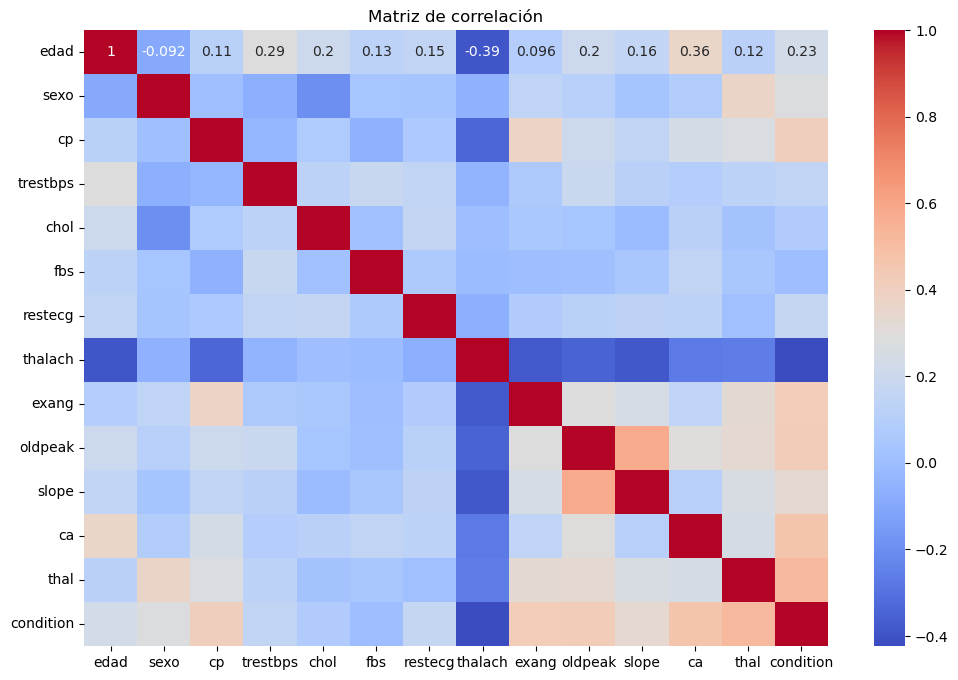

In [15]:
# Matriz de correlación entre variables
corr_matrix = Datos.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

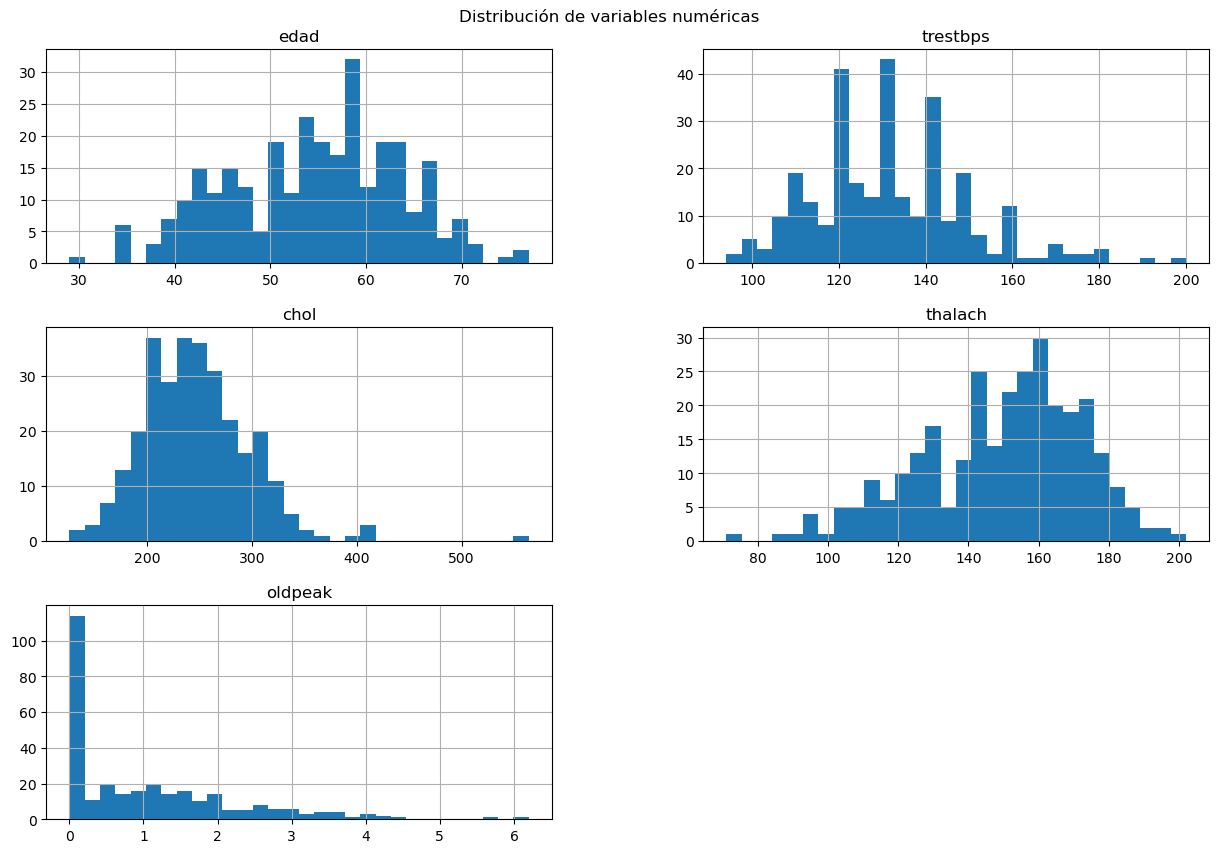

In [16]:
# Visualización de distribución de variables numéricas
num_features = ['edad', 'trestbps', 'chol', 'thalach', 'oldpeak']
Datos[num_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas', y=0.92)
plt.show()

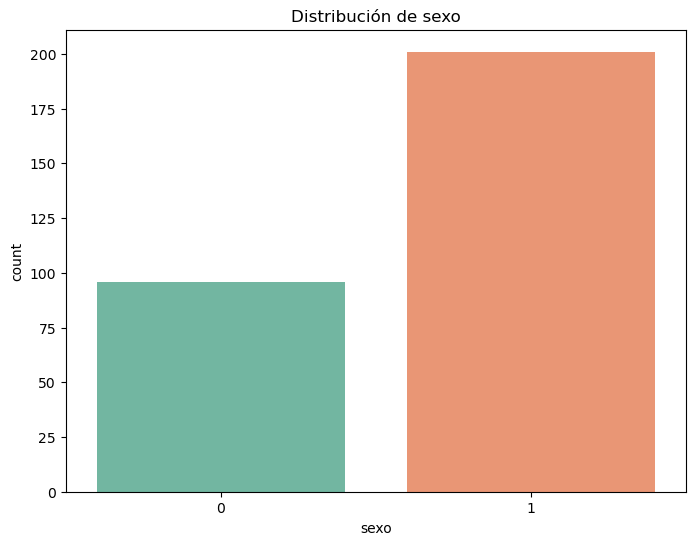

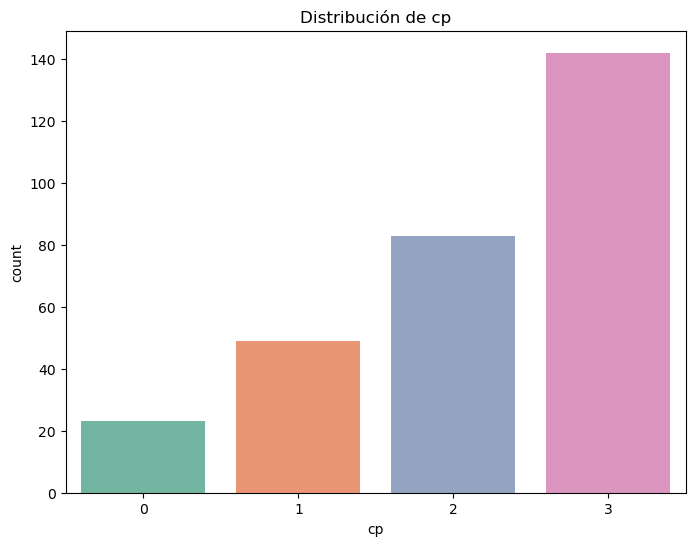

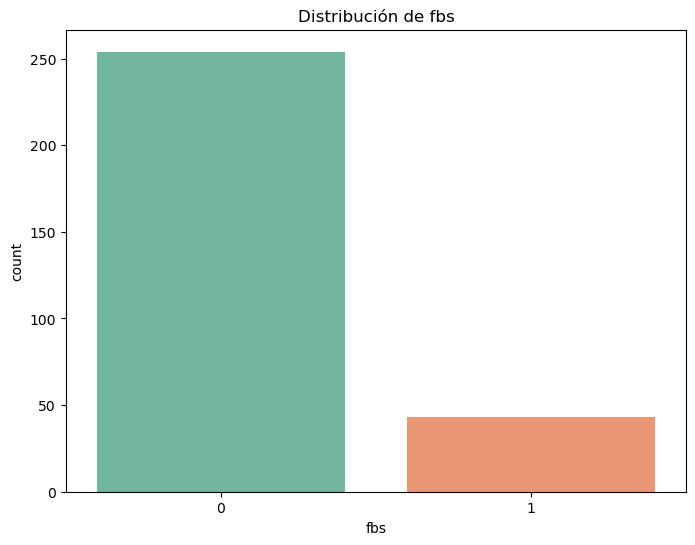

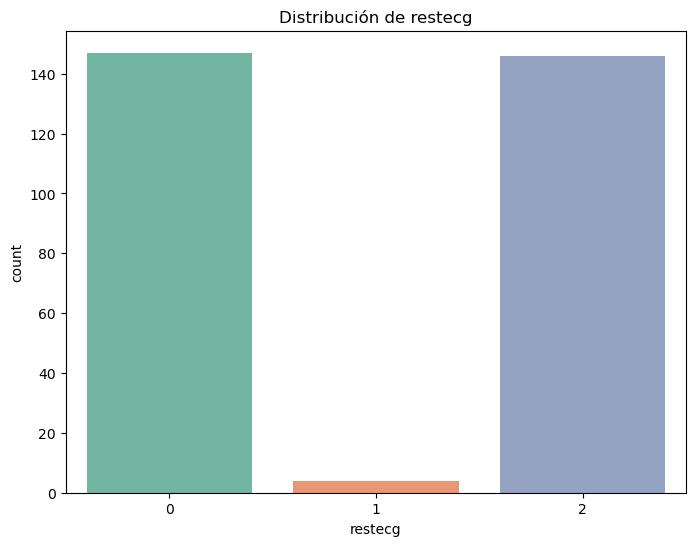

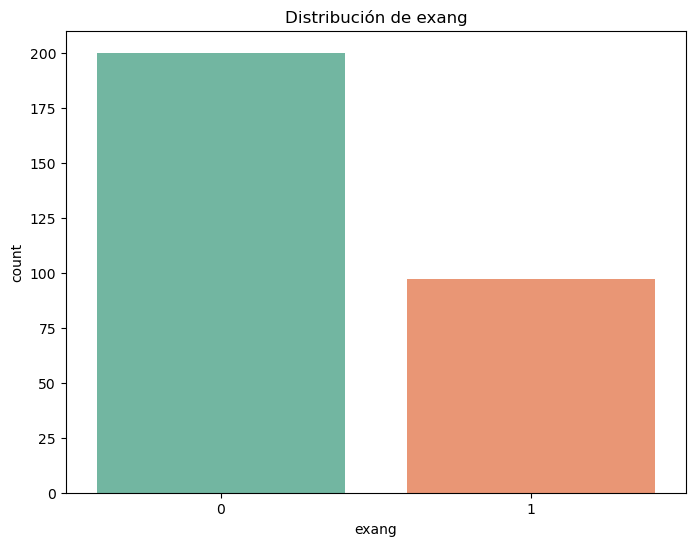

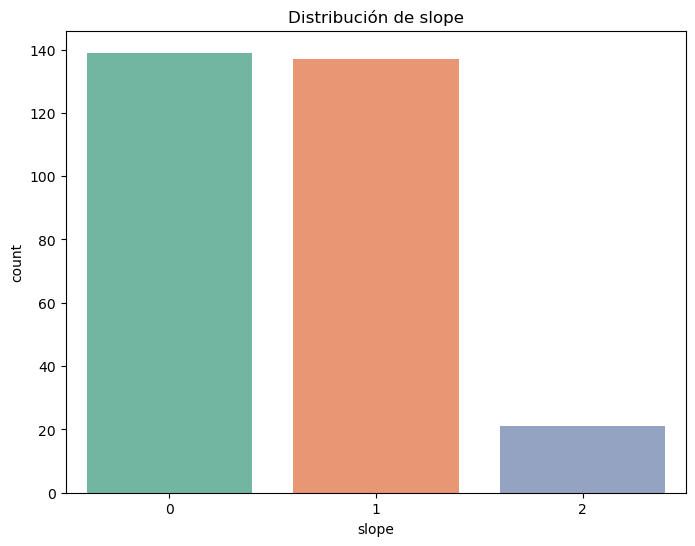

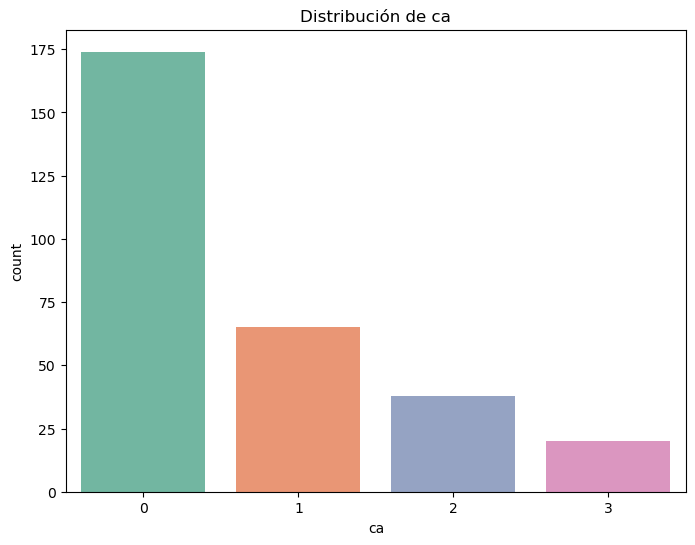

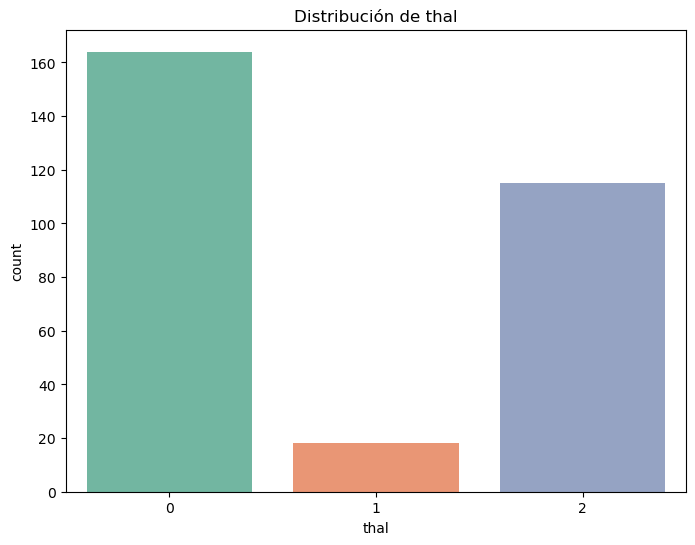

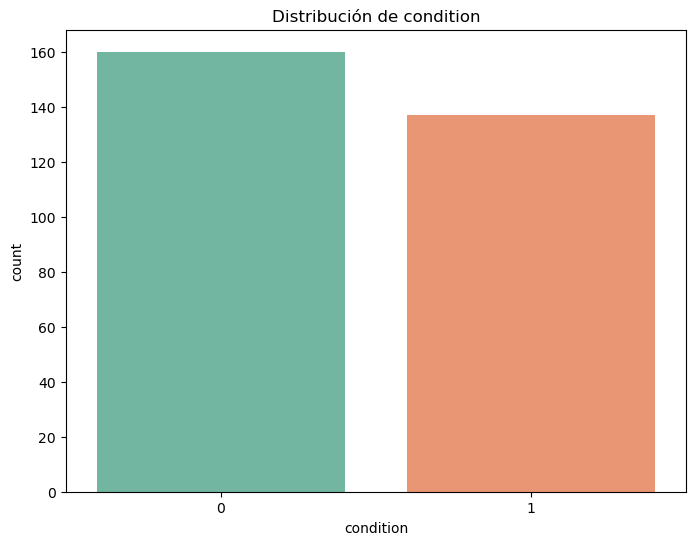

In [19]:
# Visualización de variables categóricas
cat_features = ['sexo', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=Datos, palette='Set2')
    plt.title(f'Distribución de {feature}')
    plt.show()

In [21]:

#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Verificar si hay valores faltantes en el conjunto de datos

missing_values = Datos.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
edad         0
sexo         0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


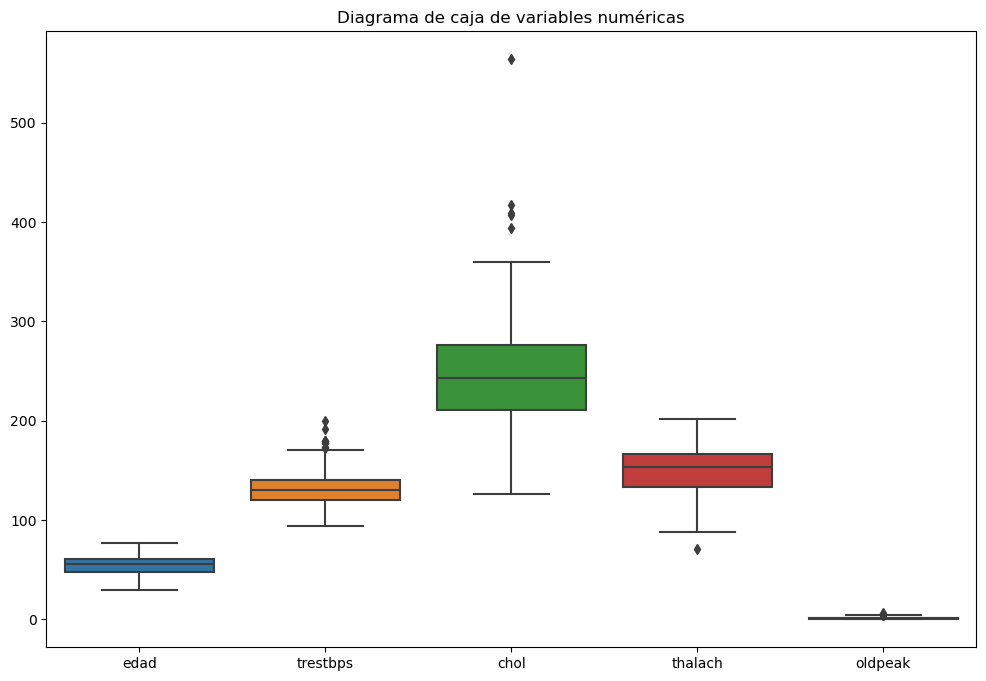

In [22]:
# Visualizar diagramas de caja (boxplots) para identificar datos atípicos en las variables numéricas

plt.figure(figsize=(12, 8))
sns.boxplot(data=Datos[num_features])
plt.title('Diagrama de caja de variables numéricas')
plt.show()


In [24]:
# Calcular los límites para los valores atípicos usando el método de IQR

Q1 = Datos[num_features].quantile(0.25)
Q3 = Datos[num_features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = (Datos[num_features] < lower_bound) | (Datos[num_features] > upper_bound)
print("Valores atípicos:")
print(outliers.sum())


Valores atípicos:
edad        0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


In [27]:
# Imputar valores atípicos con la mediana
for feature in num_features:
    Datos.loc[Datos[feature] < lower_bound[feature], feature] = Datos[feature].median()
    Datos.loc[Datos[feature] > upper_bound[feature], feature] = Datos[feature].median()

In [30]:
# Verificar si los valores atípicos han sido imputados correctamente
print("Valores atípicos después de la imputación:")
outliers_after_imputation = (Datos[num_features] < lower_bound) | (Datos[num_features] > upper_bound)
print(outliers_after_imputation.sum())

Valores atípicos después de la imputación:
edad        0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64


In [51]:

#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

# Total de personas con padecimiento cardiaco:

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [52]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [57]:

#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

#Porcentaje de datos para entrenamiento (train) = 75%, y para prueba (test) = 25% 
#se crean variables X & Y para almacenar la informacion del entrenamiento

X = Datos.drop('condition',axis=1)
Y = Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, stratify=Y, random_state=0)

In [58]:
print(X_train)

     edad  sexo  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
234    56     0   3       130  288.0    1        2      133      1      4.0   
82     66     0   2       146  278.0    0        2      152      0      0.0   
36     56     1   1       120  240.0    0        0      169      0      0.0   
237    56     1   3       132  184.0    0        2      105      1      2.1   
133    47     1   2       108  243.0    0        0      152      0      0.0   
..    ...   ...  ..       ...    ...  ...      ...      ...    ...      ...   
291    40     1   3       110  167.0    0        2      114      1      2.0   
195    61     0   3       130  330.0    0        2      169      0      0.0   
170    65     0   3       150  225.0    0        2      114      0      1.0   
135    46     0   2       142  177.0    0        2      160      1      1.4   
293    39     1   3       118  219.0    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82   

In [59]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [61]:

#5 Entrenar el modelo configurando los diferentes hiperparámetros.

#Construir el modelo de regresion logistica

modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit (X_train , Y_train)

#crea el modelo de prediccion 

prediccion= modelo_regresion.predict(X_test)

In [62]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [63]:
print (prediccion) 

[1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 1]


In [64]:

#6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

# Desempeño del modelo de regresion 

print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        40
           1       0.89      0.89      0.89        35

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



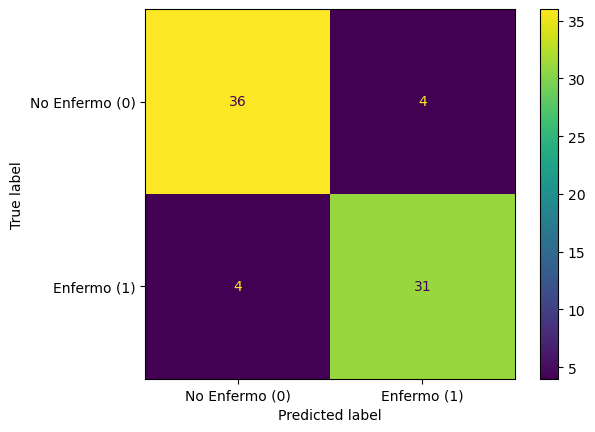

In [74]:

#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 

# Calcular la matriz de confusión
cm = confusion_matrix(y_true=Y_test, y_pred=prediccion)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Enfermo (0)", "Enfermo (1)"])
disp.plot()


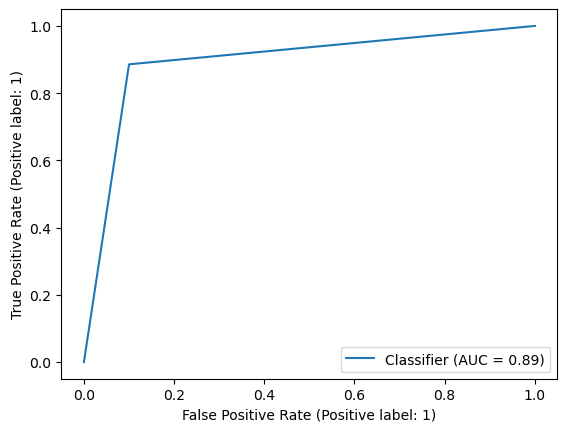

In [79]:
# Curva de precision del modelo

RocCurveDisplay.from_predictions(Y_test,prediccion)
plt.show()